In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()
sess = tf.InteractiveSession()

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [0]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [0]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [0]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [0]:
training_acc_array = []
validation_acc_array = []
training_err_array = []
validation_err_array = []

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%1000 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
  
    
    training_acc_array.append(train_accuracy)
    
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
  
  if i%1000 == 0:
    val_accuracy = accuracy.eval(feed_dict={
    x: mnist.validation.images, y_: mnist.validation.labels, keep_prob: 1.0})
    
    validation_acc_array.append(val_accuracy)
    
    print("step %d, validation accuracy %g"%(i, val_accuracy))
    

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

step 0, training accuracy 0.04
step 0, validation accuracy 0.1104
step 1000, training accuracy 0.98
step 1000, validation accuracy 0.964
step 2000, training accuracy 0.98
step 2000, validation accuracy 0.979
step 3000, training accuracy 1
step 3000, validation accuracy 0.9836
step 4000, training accuracy 0.98
step 4000, validation accuracy 0.9842
step 5000, training accuracy 0.96
step 5000, validation accuracy 0.9866
step 6000, training accuracy 1
step 6000, validation accuracy 0.988
step 7000, training accuracy 1
step 7000, validation accuracy 0.9888
step 8000, training accuracy 0.98
step 8000, validation accuracy 0.9896
step 9000, training accuracy 1
step 9000, validation accuracy 0.9904
step 10000, training accuracy 1
step 10000, validation accuracy 0.992
step 11000, training accuracy 1
step 11000

[0.0982 0.9626 0.975  0.9796 0.9858 0.9872 0.9858 0.9866 0.9898 0.9896
 0.9894 0.9918 0.9916 0.9912 0.9922 0.9916 0.9922 0.991  0.9912 0.9896]
[0.18 0.96 1.   0.98 0.96 1.   0.96 1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.  ]


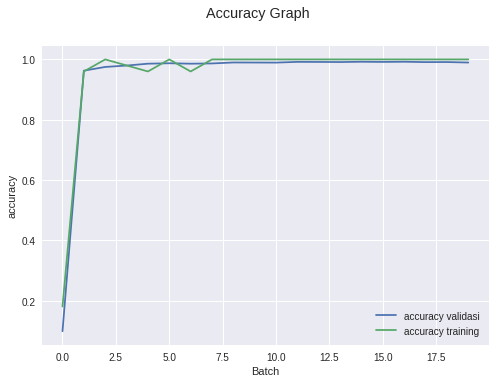

In [0]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot(validation_array,training_array):

  
    x = np.array(list(range(20)))
    valid = np.array(validation_array)
    train = np.array(training_array)
    print(valid)
    print(train)
    fig = plt.figure()
    fig.suptitle('Accuracy Graph')
    sns.set_style("darkgrid")

    plt.plot(x,validation_array, label = "accuracy validasi")
    plt.plot(x,training_array, label = "accuracy training")

    plt.xlabel('Batch')
    plt.ylabel('accuracy')
    plt.legend()

    return plt.show()
  
plot(validation_acc_array,training_acc_array)